In [281]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from mlrose_hiive import NeuralNetwork, random_hill_climb, simulated_annealing, genetic_alg, mimic, SixPeaks, \
    Queens, DiscreteOpt, MaxKColorGenerator
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score


In [276]:
def RHC_restarts_tuning(problem, max_restart_number):
    
    fit=[]
    for i in range (0, max_restart_number):

        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                      max_iters = 1000, restarts=i, random_state = 1, curve=True)
        fit.append(best_fitness)

    raw_data = {'fit': fit}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(0,50), name='Restart Number'),
                  columns=pd.Index(['fit'], name='Fitness'))
    #print(df1)
    plt.plot(df1.index,"fit", data=df1)
    #plt.ylim (0,30)
    plt.legend()
    plt.xlabel("Restart Number")
    plt.ylabel("Fitness")
    plt.title ("RHC Restart")
    plt.show()
    plt.close()

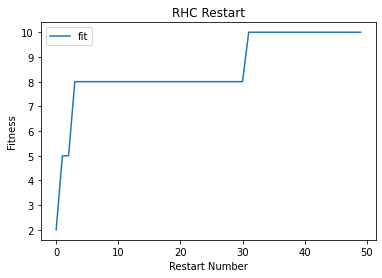

In [277]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
RHC_restarts_tuning(problem, 50)


In [278]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
RHC_restarts_tuning(problem, 50)

KeyboardInterrupt: 

In [ ]:


#edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
#fitness = mlrose.MaxKColor(edges)
#problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)
RHC_restarts_tuning(problem, 50)

In [ ]:
def SA_startTemp_tuning(problem):
    
    fit=[]
    mlrose.ExpDecay(init_temp=1)
    for i in range (1, 100):
        

        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(init_temp=i),
                                                      max_attempts = 1000, max_iters = 1000, random_state = 1, curve= True)
        fit.append(best_fitness)

    raw_data = {'fit': fit}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(1,100), name='Initial Temperature'),
                  columns=pd.Index(['fit'], name='Fitness'))
    #print(df1)
    plt.plot(df1.index,"fit", data=df1)
    #plt.ylim (0,30)
    plt.legend()
    plt.xlabel("Initial Temperature")
    plt.ylabel("Fitness")
    plt.title ("Initial Temperature")
    plt.show()
    plt.close()

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
SA_startTemp_tuning(problem)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
SA_startTemp_tuning(problem)

In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)

SA_startTemp_tuning(problem)

In [ ]:
def GA_popSize_tuning(problem):
    
    fit=[]
    
    for i in range (1, 300):
        init_state=[]
        
        best_state, best_fitness, fitness_curve=mlrose.genetic_alg(problem, pop_size=i, max_attempts = 100, max_iters = 100, random_state = 1, curve= True)
        fit.append(best_fitness)

    raw_data = {'fit': fit}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(1,300), name='Population Size'),
                  columns=pd.Index(['fit'], name='Fitness'))
    #print(df1)
    plt.plot(df1.index,"fit", data=df1)
    #plt.ylim (0,30)
    plt.legend()
    plt.xlabel("Population Size")
    plt.ylabel("Fitness")
    plt.title ("GA population Size")
    plt.show()
    plt.close()

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
GA_popSize_tuning(problem)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
GA_popSize_tuning(problem)


In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)

GA_popSize_tuning(problem)

In [ ]:
def GA_mutation_tuning(problem):
    
    fit=[]
    
    for i in range (0, 100):
        
        
        best_state, best_fitness, fitness_curve=mlrose.genetic_alg(problem, pop_size=150, mutation_prob=0.01*i, max_attempts = 100, max_iters = 100, random_state = 1, curve= True)
        fit.append(best_fitness)

    raw_data = {'fit': fit}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(0,100), name='Mutation'),
                  columns=pd.Index(['fit'], name='Fitness'))
    #print(df1)
    plt.plot(df1.index,"fit", data=df1)
    #plt.xlim (0,1)
    plt.legend()
    plt.xlabel("Mutation Percentage")
    plt.ylabel("Fitness")
    plt.title ("GA Mutation")
    plt.show()
    plt.close()

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
GA_mutation_tuning(problem)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
GA_mutation_tuning(problem)

In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)
GA_mutation_tuning(problem)

In [ ]:
def mimic_keep_tuning(problem, mimic_vectorize):
    
    fit=[]
    
    for i in range (0, 50):
        
        
        best_state, best_fitness, fitness_curve=mlrose.mimic(problem, pop_size=200,
                                                      max_attempts = 100, keep_pct=i*0.01, max_iters = 100, random_state = 1, curve= True, fast_mimic=mimic_vectorize)

        fit.append(best_fitness)
   
    raw_data = {'fit': fit}

    df1 = pd.DataFrame(raw_data,
                  index=pd.Index(range(0,50), name='Keep Percentage'),
                  columns=pd.Index(['fit'], name='Fitness'))
    #print(df1)
    plt.plot(df1.index,"fit", data=df1)
    #plt.ylim (0,30)
    plt.legend()
    plt.xlabel("Keep Percentage")
    plt.ylabel("Fitness")
    plt.title ("Mimic Keep Percentage")
    plt.show()
    plt.close()

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
mimic_keep_tuning(problem, True)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
mimic_keep_tuning(problem, True)

In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)

mimic_keep_tuning(problem, False)

In [ ]:
def iteration_plot(problem, title,mimic_vectorize ): 
    
    best_state1, best_fitness1, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = 15,
                                                      max_iters = 1000, restarts=40, random_state = 1, curve=True)
    
    best_state2, best_fitness2, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(),
                                                      max_attempts = 1000, max_iters = 1000, init_state=None,random_state = 1, curve= True)
    best_state3, best_fitness3, fitness_curve3=mlrose.genetic_alg(problem, pop_size=150, mutation_prob=0.1
                                                                  , max_attempts = 1000, max_iters = 1000, random_state = 1, curve= True)
        
    best_state4, best_fitness4, fitness_curve4=mlrose.mimic(problem, pop_size=200,
                                                      max_attempts = 1000, keep_pct=0.2, max_iters =1000, random_state = 1, curve= True, fast_mimic=mimic_vectorize)
    fig, ax = plt.subplots()
    
    ax.plot(range(0,len(fitness_curve1)), fitness_curve1, 'red', label="Hill Climbing")
    ax.plot(range(0,len(fitness_curve2)), fitness_curve2, 'blue', label="SA")
    ax.plot(range(0,len(fitness_curve3)), fitness_curve3, 'green', label="GA")
    ax.plot(range(0,len(fitness_curve4)), fitness_curve4, 'black', label="Mimic")

    ax.set_xlabel('Iterations')
    ax.set_ylabel('Fitness')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)
    plt.close()

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
iteration_plot(problem, 'Iterations Vs Fitness: Four Peaks', True)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
iteration_plot(problem, 'Iterations Vs Fitness: 8 Queens', True)

In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)
iteration_plot(problem, 'Iterations Vs Fitness: Salesman Travel', False)

In [ ]:
def iteration_time_plot(problem, title, mimic_vectorize): 
    
    
    iteration_range = 1000

    run_time_hillClimb = []
    run_time_SA=[]
    run_time_GA=[]
    run_time_mimic=[]
    iterate_range=1000
    
    for i in range(100, iterate_range+1, 100):
        
        start_time=0
        end_time=0
        start_time=time.time()
        best_state1, best_fitness1, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = i,
                                                   max_iters = i, restarts=40, random_state = 1, curve=True)
        end_time=time.time()
        run_time_hillClimb.append(end_time-start_time)
        print("hillclimb time", end_time-start_time)
        
        start_time=0
        end_time=0
        start_time=time.time()
        best_state2, best_fitness2, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(),
                                                      max_attempts = i, max_iters = i, init_state=None,random_state = 1, curve= True)
        end_time=time.time()
        run_time_SA.append(end_time-start_time)
        print("SA time", end_time-start_time)
        
        start_time=0
        end_time=0
        start_time=time.time()
        best_state3, best_fitness3, fitness_curve3=mlrose.genetic_alg(problem, pop_size=150, mutation_prob=0.1
                                                                  , max_attempts = i, max_iters = i, random_state = 1, curve= True)
        end_time=time.time()
        run_time_GA.append(end_time-start_time)
        print("GA time", end_time-start_time)
        
        start_time=0
        
        start_time=time.time()
        best_state4, best_fitness4, fitness_curve4=mlrose.mimic(problem, pop_size=200,
                                                      max_attempts =i, keep_pct=0.2, max_iters = i, random_state = 1, curve= True, fast_mimic=mimic_vectorize)
        
        
        end_time=time.time()
        run_time_mimic.append(end_time-start_time)
        print("mimic time", end_time-start_time)
    
    fig, ax = plt.subplots()
    
    ax.plot(range(100, iterate_range+1, 100), run_time_hillClimb, 'red', label="Hill Climbing")
    ax.plot(range(100, iterate_range+1, 100), run_time_SA, 'blue', label="SA")
    ax.plot(range(100, iterate_range+1, 100), run_time_GA, 'green', label="GA")
    ax.plot(range(100, iterate_range+1, 100), run_time_mimic, 'black', label="Mimic")

    ax.set_xlabel('Iterations')
    ax.set_ylabel('Time')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)
    plt.close()
   
            


In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True)
iteration_time_plot(problem, 'Iterations Vs Time: Four Peaks', True)

In [ ]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
iteration_time_plot(problem, 'Iterations Vs Time: 8 Queens', True)

In [ ]:
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)
iteration_time_plot(problem, 'Iterations Vs Time: Sales Man Travel', False)

In [ ]:
row_contain_nan=[]
data_breast_cancer=np.genfromtxt("breast-cancer-wisconsin.data",delimiter=",")
num_row=np.shape(data_breast_cancer)[0]
for i in range(num_row):
    if (np.any(np.isnan(data_breast_cancer[i]))):
        row_contain_nan.append(i)
data_breast_cancer=np.delete(data_breast_cancer,row_contain_nan,axis=0)        
#print (row_contain_nan)
data_breast_cancer=np.delete(data_breast_cancer,0, axis=1)


X_breast_cancer=np.delete(data_breast_cancer, -1, axis=1)
#print(X_breast_cancer)
y_breast_cancer=data_breast_cancer[:,-1]
for i in range (0, len(y_breast_cancer)):
    y_breast_cancer[i]=y_breast_cancer[i]/2-1
#print(y_breast_cancer)
breast_cancer_train, breast_cancer_test, breast_cancer_lable_train, breast_cancer_lable_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42)
#print ()

In [279]:
def replace_a_column (array, column_number, transformed_column):
    for i in range(len(array)):
        array[i][column_number]=transformed_column[i][0]
    return array

In [280]:
data=np.genfromtxt("processed.cleveland.data",delimiter=",")
num_row=np.shape(data)[0]
row_contain_nan=[]
for i in range(num_row):
    if (np.any(np.isnan(data[i]))):
        row_contain_nan.append(i)
        
#print (row_contain_nan)


data=np.delete(data,row_contain_nan,axis=0)
#print (type(data[0][12]))
#print (data[:,3])

for i in [3,4,7,9]:
    
    scaler = StandardScaler()
    #print("column",i, data[:,i])
    temp_column=data[:,i].reshape(-1,1)
    scaler.fit(temp_column)
    data=replace_a_column(data,i,scaler.transform(temp_column))
    #print("transformed column",i,data[:,i])
train_data_raw=data[0:int(num_row*0.7),:]
test_data_raw=data[(int(num_row*0.3)+1):(num_row-1),:]
train_data=np.delete(train_data_raw, -1, axis=1)
test_data=np.delete(test_data_raw, -1, axis=1)
train_lable=train_data_raw[:,-1]
for i in range(len(train_lable)): 
    if train_lable[i]>0:
        train_lable[i]=1
        
#print(train_lable)
test_lable=test_data_raw[:,-1]
for i in range(len(test_lable)): 
    if test_lable[i]>0:
        test_lable[i]=1

In [295]:
def neuron_network_random_search(train_X, train_Y, test_X, test_Y):
    
    hidden_nodes = [11, 32]
    
    activation='relu'
    random_state=1
    alpha=1e-06
    score_hill_climbing=[]
    score_SA=[]
    score_GA=[]
    time_hill_climbing=[]
    time_SA=[]
    time_GA=[]
    for iterations in range (5, 151, 5):
        nn_model_hill_climb = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_hill_climb.fit(train_X, train_Y)    
        time_hill_climb=time.time()-start_time
        y_pred = nn_model_hill_climb.predict(test_X)
        score_hill_climbing.append(accuracy_score(test_Y, y_pred))
        time_hill_climbing.append(time_hill_climb)
        
   
        nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing',  max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_SA.fit(train_X, train_Y)    
        time_taken_SA=time.time()-start_time
        y_pred = nn_model_SA.predict(test_X)
        score_SA.append(accuracy_score(test_Y, y_pred))
        time_SA.append(time_taken_SA)
        
        nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_GA.fit(train_X, train_Y)    
        time_taken_GA=time.time()-start_time
        y_pred = nn_model_GA.predict(test_X)
        score_GA.append(accuracy_score(test_Y, y_pred))
        time_GA.append(time_taken_GA)
        
    return score_hill_climbing, score_SA, score_GA, time_hill_climbing, time_SA, time_GA 
    

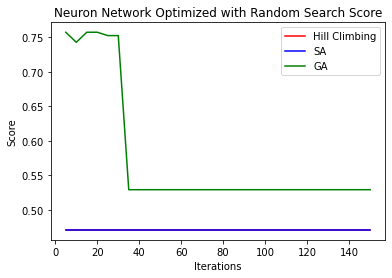

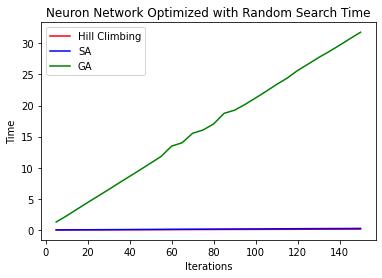

In [296]:
#score_hill_climbing, score_SA, score_GA, time_hill_climbing, time_SA, time_GA=neuron_network_random_search(breast_cancer_train, breast_cancer_lable_train, breast_cancer_test, breast_cancer_lable_test)
score_hill_climbing, score_SA, score_GA, time_hill_climbing, time_SA, time_GA=neuron_network_random_search(train_data, train_lable, test_data, test_lable)
fig, ax = plt.subplots()
    
ax.plot(range(5, 151, 5), score_hill_climbing, 'red', label="Hill Climbing")
ax.plot(range(5, 151, 5), score_SA, 'blue', label="SA")
ax.plot(range(5, 151, 5), score_GA, 'green', label="GA")

ax.set_xlabel('Iterations')
ax.set_ylabel('Score')
ax.set_title("Neuron Network Optimized with Random Search Score")
ax.legend()
plt.show(fig)
plt.close()

fig, ax = plt.subplots()
ax.plot(range(5, 151, 5), time_hill_climbing, 'red', label="Hill Climbing")
ax.plot(range(5, 151, 5), time_SA, 'blue', label="SA")
ax.plot(range(5, 151, 5), time_GA, 'green', label="GA")

ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title("Neuron Network Optimized with Random Search Time")
ax.legend()
plt.show(fig)
plt.close()

In [301]:
def neuron_network_random_search_train_score(train_X, train_Y):
    
    hidden_nodes = [11, 32]
    
    activation='relu'
    random_state=1
    alpha=1e-06
    score_hill_climbing=[]
    score_SA=[]
    score_GA=[]
    time_hill_climbing=[]
    time_SA=[]
    time_GA=[]
    for iterations in range (5, 151, 5):
       
        nn_model_hill_climb = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_hill_climb.fit(train_X, train_Y)    
        time_hill_climb=time.time()-start_time
        
        score_hill_climbing.append(nn_model_hill_climb.score(train_X, train_Y))
        time_hill_climbing.append(time_hill_climb)
        
   
        nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing',  max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_SA.fit(train_X, train_Y)    
        time_taken_SA=time.time()-start_time
        
        score_SA.append(nn_model_SA.score(train_X, train_Y))
        time_SA.append(time_taken_SA)
        
        nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)
        start_time=time.time()
        nn_model_GA.fit(train_X, train_Y)    
        time_taken_GA=time.time()-start_time
        
        score_GA.append(nn_model_GA.score(train_X, train_Y))
        time_GA.append(time_taken_GA)
                                   
    fig, ax = plt.subplots()
    
    
    

    fig, ax = plt.subplots()
    ax.plot(range(5, 151, 5), time_hill_climbing, 'red', label="Hill Climbing")
    ax.plot(range(5, 151, 5), time_SA, 'blue', label="SA")
    ax.plot(range(5, 151, 5), time_GA, 'green', label="GA")

    ax.set_xlabel('Iterations')
    ax.set_ylabel('Time')
    ax.set_title("Neuron Network Optimized with Random Search Time")
    ax.legend()
    plt.show(fig)
    plt.close()
        
   
        
    

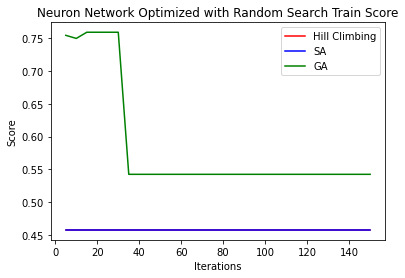

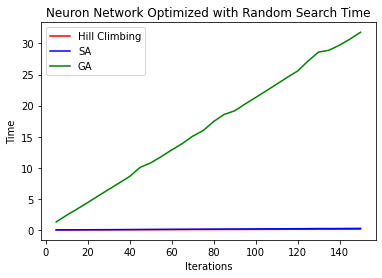

In [302]:
neuron_network_random_search_train_score(train_data, train_lable)

In [308]:
def neuron_network_fitness_curve(train_X, train_Y):
    
    hidden_nodes = [11, 32]
    
    activation='relu'
    random_state=1
    alpha=1e-06
    score_hill_climbing=[]
    score_SA=[]
    score_GA=[]
    time_hill_climbing=[]
    time_SA=[]
    time_GA=[]
    
    nn_model_hill_climb = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = 2000, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)
    start_time=time.time()
    nn_model_hill_climb.fit(train_X, train_Y)    
    hill_climb_fit_curve=nn_model_hill_climb.fitness_curve
   
    nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                            algorithm = 'simulated_annealing',  max_iters = 2000, \
                            bias = True, is_classifier = True, learning_rate = alpha, \
                            early_stopping = False,  clip_max=5,\
                            random_state = random_state, curve=True)
    start_time=time.time()
    nn_model_SA.fit(train_X, train_Y)    
    SA_fit_curve=nn_model_SA.fitness_curve
        
    nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = 2000, \
                             bias = True, is_classifier = True, learning_rate = alpha, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)
    start_time=time.time()
    nn_model_GA.fit(train_X, train_Y)    
    GA_fit_curve=nn_model_GA.fitness_curve
    
    fig, ax = plt.subplots()
    
    ax.plot(range(0,len(hill_climb_fit_curve)) ,hill_climb_fit_curve , "red", label="hill climb")
    ax.plot(range(0,len(SA_fit_curve)) ,SA_fit_curve , "blue", label="SA")
    ax.plot(range(0,len(GA_fit_curve)) ,GA_fit_curve , "green", label="GA")
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Fitness')
    ax.set_title('Fitness Curve: Neural Network ')
    ax.legend()
    plt.show(fig)
    plt.close
        
     

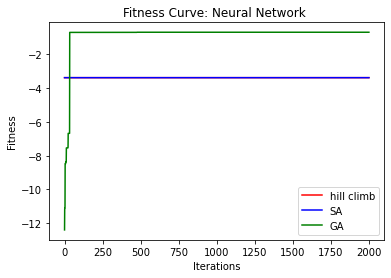

In [309]:
neuron_network_fitness_curve(train_data, train_lable)

